In [1]:
# ===============================================================
# nn_pipeline.py
# 20% Training Split + NEURAL NETWORK + Loss Curve + Submission
# ===============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


2025-11-23 06:27:15.786560: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763879236.127635      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763879236.216536      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

In [2]:
# ---------------------------------------------------------------
# Load your data
# ---------------------------------------------------------------
train = pd.read_csv("/kaggle/input/processed-financial-risk/train_processed.csv")
test = pd.read_csv("/kaggle/input/processed-financial-risk/test_processed.csv")

# Identify target
y = train["RiskFlag"]

# Drop ID columns – VERY IMPORTANT
drop_cols = ["ProfileID", "orig_index", "RiskFlag"]
X = train.drop(columns=drop_cols)
X_test = test.drop(columns=["ProfileID", "orig_index"])

In [3]:
# ---------------------------------------------------------------
# 20% Split
# ---------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

In [4]:
# ---------------------------------------------------------------
# Scaling
# ---------------------------------------------------------------
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_val_s = scaler.transform(X_val)
X_test_s = scaler.transform(X_test)

In [5]:
# ---------------------------------------------------------------
# Neural Network
# ---------------------------------------------------------------
model = keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['AUC']
)

history = model.fit(
    X_train_s,
    y_train,
    validation_data=(X_val_s, y_val),
    epochs=40,
    batch_size=64,
    verbose=1
)

Epoch 1/40


2025-11-23 06:27:37.215736: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


2554/2554 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - AUC: 0.7033 - loss: 0.3325 - val_AUC: 0.7455 - val_loss: 0.3176
Epoch 2/40
2554/2554 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - AUC: 0.7410 - loss: 0.3201 - val_AUC: 0.7500 - val_loss: 0.3157
Epoch 3/40
2554/2554 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - AUC: 0.7485 - loss: 0.3159 - val_AUC: 0.7517 - val_loss: 0.3151
Epoch 4/40
2554/2554 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - AUC: 0.7467 - loss: 0.3146 - val_AUC: 0.7536 - val_loss: 0.3146
Epoch 5/40
2554/2554 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - AUC: 0.7492 - loss: 0.3147 - val_AUC: 0.7541 - val_loss: 0.3144
Epoch 6/40
2554/2554 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - AUC: 0.7511 - loss: 0.3170 - val_AUC: 0.7535 - val_loss: 0.3146
Epoch 7/40
2554/2554 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - AUC: 0.7494 - loss: 0.3177 - val_AUC: 0.7534 - val_loss: 0.3146
Epoch 8/40
2554/2554 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - AUC: 0.7512 - loss: 0.3151 - val_AUC: 0.7534 - val_loss: 0.3150
Epoch 9/40
2554/2554 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/st

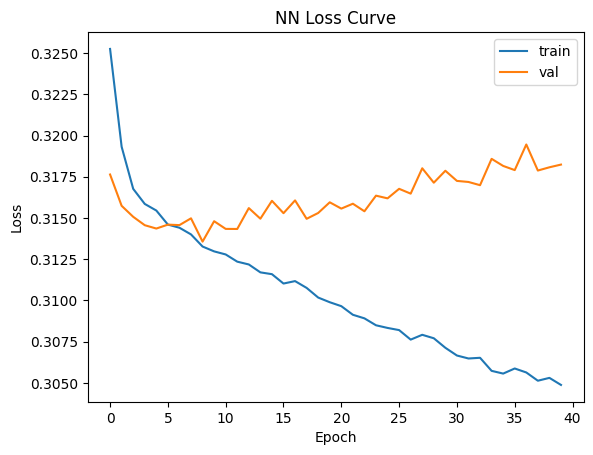

In [6]:
# ---------------------------------------------------------------
# Loss curves
# ---------------------------------------------------------------
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title("NN Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.savefig("nn_loss_curve.png", dpi=200)

In [7]:
# ---------------------------------------------------------------
# Validation AUC
# ---------------------------------------------------------------
pred_val = model.predict(X_val_s).ravel()
auc = roc_auc_score(y_val, pred_val)
print("Validation AUC:", auc)

1277/1277 ━━━━━━━━━━━━━━━━━━━━ 1s 944us/step
Validation AUC: 0.7453430353848494


In [8]:
# ---------------------------------------------------------------
# Predict on TEST (0/1)
# ---------------------------------------------------------------
test_prob = model.predict(X_test_s).ravel()
test_pred = (test_prob > 0.5).astype(int)

sub = pd.DataFrame({
    "ProfileID": test["ProfileID"],   # <--- REQUIRED COLUMN
    "risk_flag": test_pred.astype(int)
})

sub.to_csv("nn_submission.csv", index=False)

print("Saved: nn_loss_curve.png")
print("Saved: nn_submission.csv")


1596/1596 ━━━━━━━━━━━━━━━━━━━━ 1s 914us/step
Saved: nn_loss_curve.png
Saved: nn_submission.csv
